In [1]:
import math


def get_couplings(
    fermion_mass: float,
    vector_fermion_mass: float,
    vev_h: float,
    vev_phi: float,
    LambdaRatio: float,
) -> dict:
    """
    Parameters
    ----------
    fermion_mass : float
        Mass of the fermion.
    vector_fermion_mass : float
        Mass of the vector-like fermion.
    vev_h : float
        Vacuum expectation value of the Higgs.
    vev_phi : float
        Vacuum expectation value of the scalar.
    lambdaRatio : float
        Ratio lambdaL/lambdaR.

    Returns
    -------
    dict
        Dictionary containing the couplings.

    """

    LambdaProduct = 2 * fermion_mass * vector_fermion_mass / (vev_h * vev_phi)

    # xy = a, x/y = b => x = sqrt(ab), y = sqrt(a/b)

    LambdaL = math.sqrt(LambdaProduct * LambdaRatio)
    LambdaR = math.sqrt(LambdaProduct / LambdaRatio)


    m_prime = math.sqrt(vector_fermion_mass**2 + ((LambdaL * vev_h)**2 + (LambdaR * vev_phi)**2)/2 )
    tanThetaL = -(fermion_mass **2 / (LambdaL * vev_h / math.sqrt(2) ) - LambdaL * vev_h / math.sqrt(2))/m_prime
    tanThetaR = -(fermion_mass **2 / (LambdaR * vev_phi / math.sqrt(2) ) - LambdaR * vev_phi / math.sqrt(2))/m_prime

    rel_tol = 1e-2

    if abs(fermion_mass - LambdaL * LambdaR * vev_h* vev_phi/(2*vector_fermion_mass)) / (fermion_mass) > rel_tol:
        print("fermion_mass", fermion_mass)
        print("tanThetaL * tanThetaR", tanThetaL * tanThetaR)
        raise ValueError("Parameters inconsistent with fermion mass")

    threshold = 4 * math.pi / math.sqrt(3.0)
    conditions = {
        "LambdaL / math.sqrt(2.0)": LambdaL / math.sqrt(2.0),
        "LambdaR / math.sqrt(2.0)": LambdaR / math.sqrt(2.0),
        "fermion_mass / vev_phi": fermion_mass / vev_phi,
        "fermion_mass / vev_h": fermion_mass / vev_h,
        "fermion_mass * LambdaRatio / vev_phi": fermion_mass * LambdaRatio / vev_phi,
        "fermion_mass / (vev_h * LambdaRatio)": fermion_mass / (vev_h * LambdaRatio),
    }

    if any(value > threshold for value in conditions.values()):
        print("Warning: Yukawa couplings are being calculated with large values")
        [print(key, value) for key, value in conditions.items() if value > threshold]

    sinThetaL = math.sin(math.atan(tanThetaL))
    cosThetaL = math.cos(math.atan(tanThetaL))

    sinThetaR = math.sin(math.atan(tanThetaR))
    cosThetaR = math.cos(math.atan(tanThetaR))

    C1L = LambdaL / (2.0 * math.sqrt(2.0)) * ((cosThetaL * cosThetaR) - (sinThetaL * sinThetaR))
    C2L = LambdaL / (2.0 * math.sqrt(2.0)) * ((cosThetaL * cosThetaR) + (sinThetaL * sinThetaR))
    C1R = LambdaR / (2.0 * math.sqrt(2.0)) * ((cosThetaL * cosThetaR) - (sinThetaL * sinThetaR))
    C2R = LambdaR / (2.0 * math.sqrt(2.0)) * ((cosThetaL * cosThetaR) + (sinThetaL * sinThetaR))

    return {
        "thetaL": math.atan(tanThetaL),
        "thetaR": math.atan(tanThetaR),
        "LambdaL": LambdaL,
        "LambdaR": LambdaR,
        "C1L": C1L,
        "C2L": C2L,
        "C1R": C1R,
        "C2R": C2R,
        "vev_phi": vev_phi,
        "V": vev_phi / math.sqrt(2.0),
    }

In [2]:
from plot import get_all_widths


def get_mg5_params(xu_mass, phi_mass, ytT=1.0, lambRatio=1.0):
    xu_mass = xu_mass
    top_mass = 172.5
    mu_mass = 0.10566
    bottom_mass = 4.7
    LambdaR = math.sqrt(2) * ytT
    LambdaL = LambdaR * lambRatio

    vev_h = 246
    vev_phi = 2 * top_mass * xu_mass / (LambdaL * LambdaR * vev_h)

    top_couplings = get_couplings(
        fermion_mass=top_mass,
        vector_fermion_mass=xu_mass,
        vev_h=vev_h,
        vev_phi=vev_phi,
        LambdaRatio=LambdaL / LambdaR,
    )

    mu_couplings = get_couplings(
        fermion_mass=mu_mass,
        vector_fermion_mass=xu_mass,
        vev_h=vev_h,
        vev_phi=vev_phi,
        LambdaRatio=LambdaL / LambdaR,
    )

    botom_couplings = get_couplings(
        fermion_mass=bottom_mass,
        vector_fermion_mass=xu_mass,
        vev_h=vev_h,
        vev_phi=vev_phi,
        LambdaRatio=LambdaL / LambdaR,
    )

    widths = get_all_widths(
        phi_mass=phi_mass,
        gauge_mass=phi_mass,
        vev=vev_phi,
    )

    mg5_params = {
        # mg5_key: value
        "pivev": top_couplings.get("V"),
        "mpip": phi_mass,
        "mpip__2": phi_mass,
        "mxu": xu_mass,
        "mxd": xu_mass,
        "mxl": xu_mass,
        "mxv": xu_mass,
        "mxu__2": xu_mass,
        "mxd__2": xu_mass,
        "mxl__2": xu_mass,
        "mxv__2": xu_mass,
        "lamLu": top_couplings.get("LambdaL"),
        "lamRu": top_couplings.get("LambdaR"),
        "thetauL": top_couplings.get("thetaL"),
        "C1Lu": top_couplings.get("C1L"),
        "C2Lu": top_couplings.get("C2L"),
        "C1Ru": top_couplings.get("C1R"),
        "C2Ru": top_couplings.get("C2R"),
        "lamLd": botom_couplings.get("LambdaL"),
        "lamRd": botom_couplings.get("LambdaR"),
        "thetadL": botom_couplings.get("thetaL"),
        "C1Ld": botom_couplings.get("C1L"),
        "C2Ld": botom_couplings.get("C2L"),
        "C1Rd": botom_couplings.get("C1R"),
        "C2Rd": botom_couplings.get("C2R"),
        "lamLl": mu_couplings.get("LambdaL"),
        "lamRl": mu_couplings.get("LambdaR"),
        "thetalL": mu_couplings.get("thetaL"),
        "C1Ll": mu_couplings.get("C1L"),
        "C2Ll": mu_couplings.get("C2L"),
        "C1Rl": mu_couplings.get("C1R"),
        "C2Rl": mu_couplings.get("C2R"),
        "ypgg": 0.0,
        "WXu": "auto",
        "WXd": "auto",
        "WXl": "auto",
        "WXv": "auto",
        "WvR": 0.0,
        "Wphip": sum(widths.values()),
    }

    return mg5_params

In [3]:
get_mg5_params(1000, 200, ytT=1.0, lambRatio=0.1)

{'pivev': 4958.370721734936,
 'mpip': 200,
 'mpip__2': 200,
 'mxu': 1000,
 'mxd': 1000,
 'mxl': 1000,
 'mxv': 1000,
 'mxu__2': 1000,
 'mxd__2': 1000,
 'mxl__2': 1000,
 'mxv__2': 1000,
 'lamLu': 0.14142135623730953,
 'lamRu': 1.4142135623730951,
 'thetauL': -0.1657630577245261,
 'C1Lu': 0.040858964822515165,
 'C2Lu': 0.029253809033508146,
 'C1Ru': 0.4085896482251516,
 'C2Ru': 0.29253809033508144,
 'lamLd': 0.023343683004870594,
 'lamRd': 0.23343683004870594,
 'thetadL': -0.0009018553652307879,
 'C1Ld': 0.006585890625487555,
 'C2Ld': 0.006576908022359925,
 'C1Rd': 0.06585890625487555,
 'C2Rd': 0.06576908022359924,
 'lamLl': 0.0035000621112501276,
 'lamRl': 0.03500062111250127,
 'thetalL': 0.0005817963485572979,
 'C1Ll': 0.0012196343659677512,
 'C2Ll': 0.0012198770520466995,
 'C1Rl': 0.012196343659677509,
 'C2Rl': 0.012198770520466992,
 'ypgg': 0.0,
 'WXu': 'auto',
 'WXd': 'auto',
 'WXl': 'auto',
 'WXv': 'auto',
 'WvR': 0.0,
 'Wphip': 2.365776309846355e-06}

In [4]:
import os
from subprocess import Popen, PIPE
import pandas as pd
from xslha import read as lha_file
from io import StringIO

mg5_path = os.path.join("/Collider", "MG5_aMC_v3_1_0", "bin", "mg5_aMC")
UFO_path = os.path.join(os.getcwd(), "U1T3R_FR", "U1T3R_UFO_Jan27")
outputs_path = os.path.join(os.getcwd(), "outputs")
os.makedirs(outputs_path, exist_ok=True)


def get_point_info(
    xu_mass,
    phi_mass,
    ytT=1.0,
    lambRatio=1.0,
    output_name=None,
    n_workers=8,
    n_events=10000,
):

    if output_name is None:
        output_name = f"output_{xu_mass}_{phi_mass}_{ytT}_{lambRatio}"
    output_path = os.path.join(outputs_path, output_name)
    command = f"""
    import model {UFO_path}
    generate p p > t xu~ pip / z
    add process p p > t~ xu pip / z
    output {output_path} -nojpeg

    """

    with open(os.path.join(outputs_path, "test.mg5"), "w") as f:
        f.write(command)
        f.write(f"launch {output_path} -m \n")
        f.write(f"{n_workers}\n")
        [
            f.write(f"set {key.upper()} {value}\n")
            for key, value in get_mg5_params(xu_mass, phi_mass, ytT, lambRatio).items()
        ]
        # f.write("set iseed 0\n")
        # f.write("set sde_strategy 1\n")
        f.write(f"set nevents {n_events}\n")
        f.write("done\n")

    Popen(
        [mg5_path, os.path.join(outputs_path, "test.mg5")], stdin=PIPE, stdout=PIPE, stderr=PIPE
    ).wait()
    # Get the cross section from the html file
    with open(os.path.join(output_path, "crossx.html"), "r") as f:
        html_string = f.read()
    t = pd.read_html(StringIO(html_string))[0]
    try:
        xs = float(t["Cross section (pb)"][0].split(" ")[0])
    except ValueError:
        xs = 0.0
    param_card = lha_file(os.path.join(output_path, "Cards", "param_card.dat"))
    return {"cross_section": xs, "output_path": output_path, "param_card": param_card}

In [5]:
spc = get_point_info(1000, 100, n_events=1000, lambRatio=0.1, ytT=2.0)
spc = spc["param_card"]

In [6]:
spc.br[9000005][(5, 24)]

0.3921324

In [7]:
#!pip install --upgrade matplotlib
from plot import get_all_branching_ratios

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

phi_masses = [1, 5, 10, 50, 100, 325]
vector_like_top_masses = [500, 750, 1000, 1500, 2000, 2500]

# Create a DataFrame to store the results
results = []

# Calculate the cross-section for each combination
for phi_mass in phi_masses:
    for xu_mass in vector_like_top_masses:
        info = get_point_info(
            xu_mass, phi_mass, n_events=1000, lambRatio=0.1, ytT=2.0, n_workers=12
        )
        cross_section = info.get("cross_section")
        br_vectorlike = info.get("param_card").br[9000005].get((5, 24))
        br_phiprime = get_all_branching_ratios(phi_mass, 200).get(r"$\mu^+\mu^-$")
        results.append(
            {
                "phi_mass": phi_mass,
                "xu_mass": xu_mass,
                "cross_section": cross_section,
                "br_vectorlike": br_vectorlike,
                "br_phiprime": br_phiprime,
            }
        )


# Display the DataFrame

In [9]:
a = get_all_branching_ratios(100, 100).get(r"$\mu^+\mu^-$")
print(a)

0.00047558645037939633


In [10]:
import pandas as pd

# Create DataFrame with phi_masses as rows and vector_like_top_masses as columns
df_predecay = pd.DataFrame(index=phi_masses, columns=vector_like_top_masses)
df_br_vectorlike = pd.DataFrame(index=phi_masses, columns=vector_like_top_masses)
df_br_phiprime = pd.DataFrame(index=phi_masses, columns=vector_like_top_masses)
df_postdecay = pd.DataFrame(index=phi_masses, columns=vector_like_top_masses)

# Fill the DataFrame with cross_section value vggggggggggggggggggs
for result in results:
    phi_mass = result["phi_mass"]
    xu_mass = result["xu_mass"]
    df_predecay.at[phi_mass, xu_mass] = result["cross_section"]
    df_br_vectorlike.at[phi_mass, xu_mass] = result["br_vectorlike"]
    df_br_phiprime.at[phi_mass, xu_mass] = result["br_phiprime"]
    df_postdecay.at[phi_mass, xu_mass] = result["cross_section"] * result["br_vectorlike"] * result["br_phiprime"] * 0.98*0.11



In [11]:
from io import StringIO
import pandas as pd
data = """
0.1292000000	0.0613100000	0.0299900000	0.0073040000	0.0016790000	0.0004024
0.1291000000	0.0612500000	0.0299600000	0.0072960000	0.0016760000	0.0004024
0.1291000000	0.0612400000	0.0299500000	0.0072960000	0.0016740000	0.0004132
0.1262000000	0.0606400000	0.0298000000	0.0072800000	0.0016710000	0.0004012
0.1172000000	0.0589500000	0.0293400000	0.0072260000	0.0016650000	0.0004000
0.0089690000	0.0388800000	0.0237400000	0.0066090000	0.0015850000	0.0003100
"""
xu_masses = [500, 750, 1000, 1500, 2000, 2500]  # GeV
# Read the data into a DataFrame
old_xs_df = pd.read_csv(StringIO(data), sep="\t", header=None)

# Set the column names to the xu masses
old_xs_df.columns = [int(x) for x in xu_masses]

# Set the index to the phi masses
old_xs_df.index = [int(x) for x in phi_masses]

old_xs_df


,500,750,1000,1500,2000,2500
1,0.129200,0.06131,0.02999,0.007304,0.001679,0.000402
5,0.129100,0.06125,0.02996,0.007296,0.001676,0.000402
10,0.129100,0.06124,0.02995,0.007296,0.001674,0.000413
50,0.126200,0.06064,0.02980,0.007280,0.001671,0.000401
100,0.117200,0.05895,0.02934,0.007226,0.001665,0.000400
325,0.008969,0.03888,0.02374,0.006609,0.001585,0.000310


In [12]:
df_predecay

,500,750,1000,1500,2000,2500
1,2.947,0.2576,0.03875,0.00183,0.000133,0.000011
5,2.948,0.2576,0.03876,0.001832,0.000133,0.000011
10,2.947,0.2574,0.03875,0.001831,0.000133,0.000011
50,2.876,0.2544,0.03859,0.001829,0.000133,0.000011
100,2.693,0.2481,0.03807,0.001816,0.000133,0.000011
325,0.2559,0.166,0.03077,0.001644,0.000125,0.000011


In [13]:
df_br_vectorlike

,500,750,1000,1500,2000,2500
1,0.334947,0.37419,0.392132,0.406695,0.412183,0.414797
5,0.334947,0.37419,0.392132,0.406695,0.412183,0.414797
10,0.334947,0.37419,0.392132,0.406695,0.412183,0.414797
50,0.334947,0.37419,0.392132,0.406695,0.412183,0.414797
100,0.334947,0.37419,0.392132,0.406695,0.412183,0.414797
325,0.334947,0.37419,0.392132,0.406695,0.412183,0.414797


In [14]:
df_br_phiprime

,500,750,1000,1500,2000,2500
1,0.50745,0.50745,0.50745,0.50745,0.50745,0.50745
5,0.005098,0.005098,0.005098,0.005098,0.005098,0.005098
10,0.001576,0.001576,0.001576,0.001576,0.001576,0.001576
50,0.000511,0.000511,0.000511,0.000511,0.000511,0.000511
100,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476
325,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213


In [15]:
df_br_vectorlike*df_br_phiprime*0.98*0.11

,500,750,1000,1500,2000,2500
1,0.018323,0.020469,0.021451,0.022247,0.022548,0.022691
5,0.000184,0.000206,0.000215,0.000223,0.000226,0.000228
10,0.000057,0.000064,0.000067,0.000069,0.00007,0.00007
50,0.000018,0.000021,0.000022,0.000022,0.000023,0.000023
100,0.000017,0.000019,0.00002,0.000021,0.000021,0.000021
325,0.000008,0.000009,0.000009,0.000009,0.000009,0.00001


In [16]:
# increase the number of significant digits to nine
pd.options.display.float_format = "{:.9f}".format
df_postdecay

,500,750,1000,1500,2000,2500
1,0.053996883,0.005272910,0.000831221,0.000040713,0.000003006,0.000000260
5,0.000542601,0.000052968,0.000008352,0.000000409,0.000000030,0.000000003
10,0.000167741,0.000016368,0.000002582,0.000000127,0.000000009,0.000000001
50,0.000053064,0.000005244,0.000000834,0.000000041,0.000000003,0.000000000
100,0.000046245,0.000004760,0.000000765,0.000000038,0.000000003,0.000000000
325,0.000001970,0.000001427,0.000000277,0.000000015,0.000000001,0.000000000


In [ ]:
import pickle as pkl

# save df_postdecay to a file

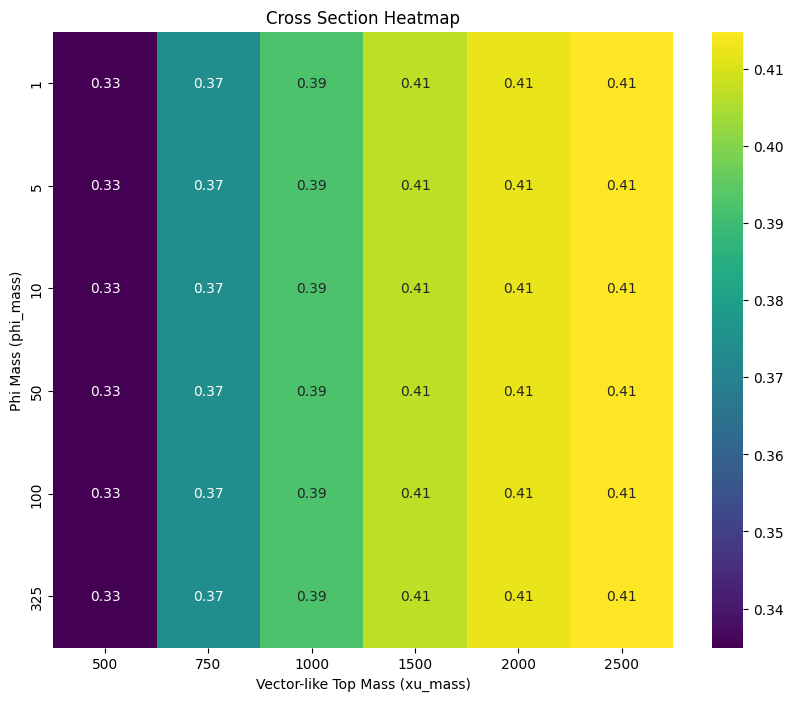

In [17]:
# make a heatmap of the cross-sections
heatmap_data = df_br_vectorlike.astype(float)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis")
plt.title("Cross Section Heatmap")
plt.xlabel("Vector-like Top Mass (xu_mass)")
plt.ylabel("Phi Mass (phi_mass)")
plt.savefig("cross_section_heatmap.png")
plt.show()